<a href="https://colab.research.google.com/github/GlebSimon/Gleb/blob/main/EDA_for_Amazon_Top_50_Books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [2]:
df = pd.read_csv('Amazon Top 50 Books 2009-2021 - Reworked Sheet (1).csv')

In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Price_r,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,"17,350",$8.00,$8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,"2,052",$22.00,$22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,"18,979",$15.00,$15,2018,Non Fiction
3,1984,George Orwell,4.7,"70,425",$7.48,$8,2021,Fiction
4,1984 (Signet Classics),George Orwell,4.7,"21,424",$6.00,$6,2017,Fiction


In [5]:
df.shape

(650, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         650 non-null    object 
 1   Author       650 non-null    object 
 2   User Rating  650 non-null    float64
 3   Reviews      650 non-null    object 
 4   Price        650 non-null    object 
 5   Price_r      650 non-null    object 
 6   Year         650 non-null    int64  
 7   Genre        650 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 40.8+ KB


In [10]:
df.isna().mean()

Name           0.0
Author         0.0
User Rating    0.0
Reviews        0.0
Price          0.0
Price_r        0.0
Year           0.0
Genre          0.0
dtype: float64

In [13]:
df.groupby('Genre').agg({'Name':'count'})

,Name
Genre,
Fiction,287
Non Fiction,363


In [30]:
df['Price_r'] = df['Price_r'].str.strip('$').astype(float)

In [33]:
df.groupby('Genre').agg({'User Rating':'mean', 'Reviews':'mean', 'Price_r':'mean'})

,User Rating,Reviews,Price_r
Genre,,,
Fiction,4.659233,21011.850174,10.606272
Non Fiction,4.616529,14194.914601,14.528926


In [34]:
df.groupby('Author')['Reviews'].agg(['max']).sort_values('max', ascending=False).head(5) # top 5 reviews

,max
Author,
Matt Haig,193482
Colleen Hoover,141748
Delia Owens,120727
Kristin Hannah,117146
Taylor Jenkins Reid,111053


In [35]:
df.groupby('Author')['User Rating'].agg(['max']).sort_values('max', ascending=False).head(10) # top 10 rating

,max
Author,
Sarah Young,4.9
Patrick Thorpe,4.9
Jill Twiss,4.9
Jeff Kinney,4.9
Pete Souza,4.9
J.K. Rowling,4.9
Barack Obama,4.9
J. K. Rowling,4.9
Bill Martin Jr.,4.9


In [36]:
df.groupby('Author')['User Rating'].agg(['max']).sort_values('max', ascending=False).tail(10) # worst 10 rating


,max
Author,
Mark Hyman M.D.,4.2
Pierre Dukan,4.1
Paula Hawkins,4.1
Ian K. Smith M.D.,4.1
Chris Cleave,4.1
Muriel Barbery,4.0
Gillian Flynn,4.0
Gallup,4.0
Conor Riordan,4.0


In [41]:
df.groupby(['Year', 'Genre']).agg({'User Rating':'mean'}) # average user rating over the years

User Rating
Year Genre                   
2009 Fiction         4.591667
     Non Fiction     4.576923
2010 Fiction         4.615000
     Non Fiction     4.520000
2011 Fiction         4.619048
     Non Fiction     4.513793
2012 Fiction         4.495238
     Non Fiction     4.558621
2013 Fiction         4.545833
     Non Fiction     4.561538
2014 Fiction         4.631034
     Non Fiction     4.609524
2015 Fiction         4.652941
     Non Fiction     4.645455
2016 Fiction         4.715789
     Non Fiction     4.654839
2017 Fiction         4.737500
     Non Fiction     4.588462
2018 Fiction         4.738095
     Non Fiction     4.617241
2019 Fiction         4.820000
     Non Fiction     4.686667
2020 Fiction         4.713043
     Non Fiction     4.737037
2021 Fiction         4.716667
     Non Fiction     4.746154

**Top 10 Authors**

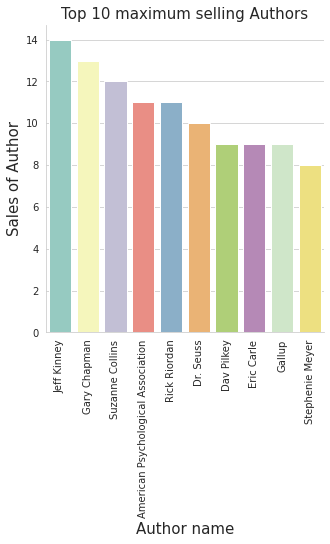

In [45]:
sns.set_style('whitegrid')
sns.catplot(x='Author', kind='count', data=df, order = df['Author'].value_counts()[:10].index)
plt.title('Top 10 maximum selling Authors', fontsize=15)
plt.xlabel('Author name', fontsize=15)
plt.ylabel('Sales of Author', fontsize=15)
plt.xticks(rotation=90)
plt.show()

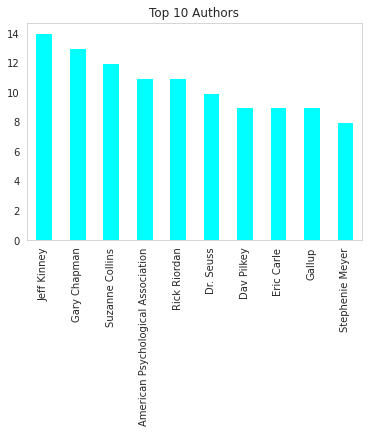

In [52]:
df['Author'].value_counts().head(10).plot(kind='bar', color = 'cyan', title ='Top 10 Authors',  grid = False)
plt.show()